<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/GMM%2BBIC_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np

mpg = sns.load_dataset("mpg")
mpg_num = mpg.select_dtypes(include='number') # keep only numeric variables 
mpg_num.drop(['cylinders'],axis=1,inplace=True)
df = mpg_num.dropna() # remove observations with NaNs
X = np.array(df)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [2]:
X.shape

(392, 6)

[19491.128615952744]
[19491.128615952744, 18868.94095108913]
[19491.128615952744, 18868.94095108913, 18754.29707913514]
[19491.128615952744, 18868.94095108913, 18754.29707913514, 18767.169428131005]
[19491.128615952744, 18868.94095108913, 18754.29707913514, 18767.169428131005, 18770.632281560775]
...and the winner is GMM model G = 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<Figure size 864x432 with 0 Axes>

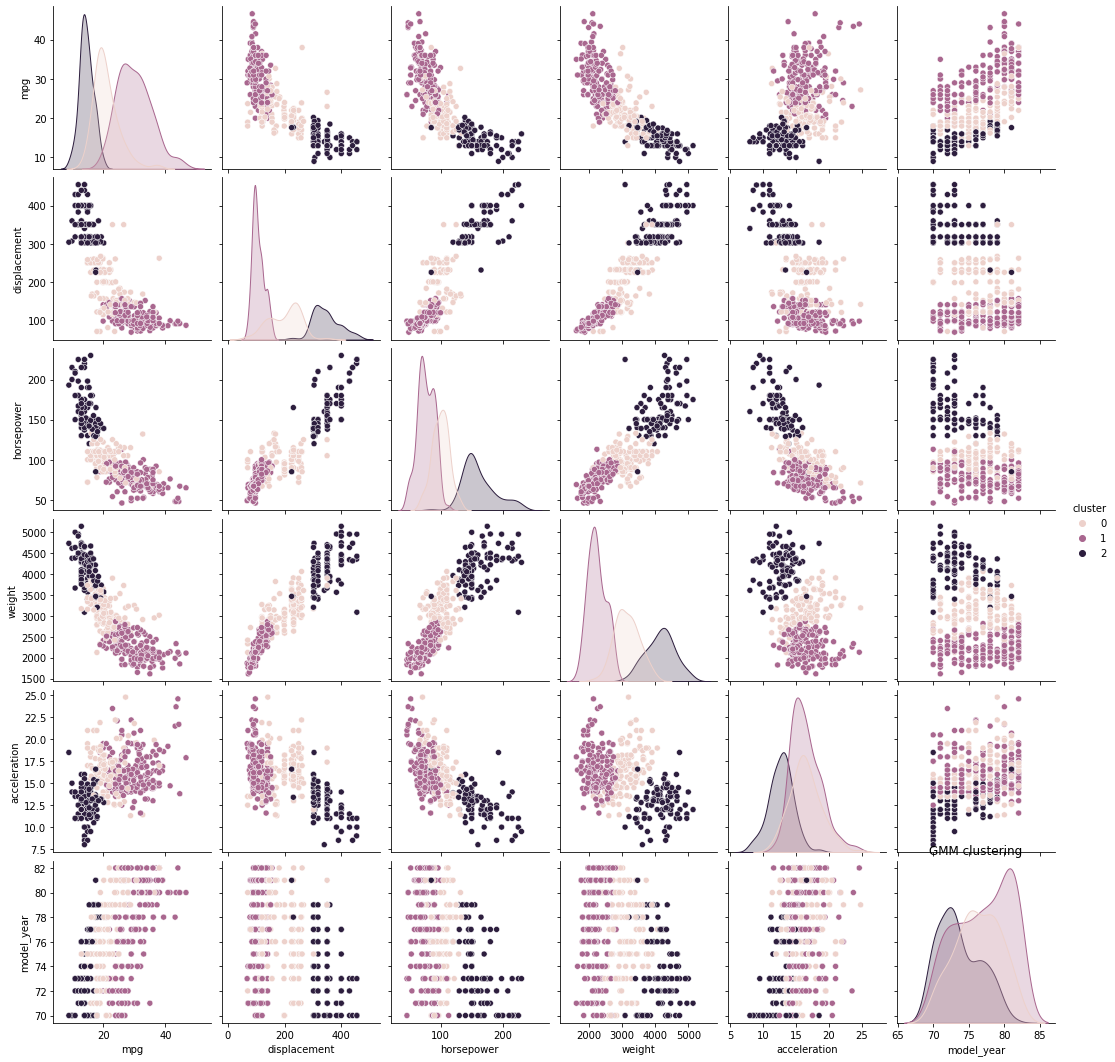

In [3]:
from sklearn.datasets import make_blobs
import numpy as np
import seaborn as sns
from sklearn import mixture
import matplotlib.pyplot as plt


NMAX = 5
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(X)
    bic.append(gmm.bic(X))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(X)

y_pred_gmm = gmm.fit_predict(X)

df['cluster'] = y_pred_gmm

fig = plt.figure(figsize=(12,6))
sns.pairplot(df,hue='cluster')
plt.title("GMM clustering")
plt.show()

<Figure size 864x432 with 0 Axes>

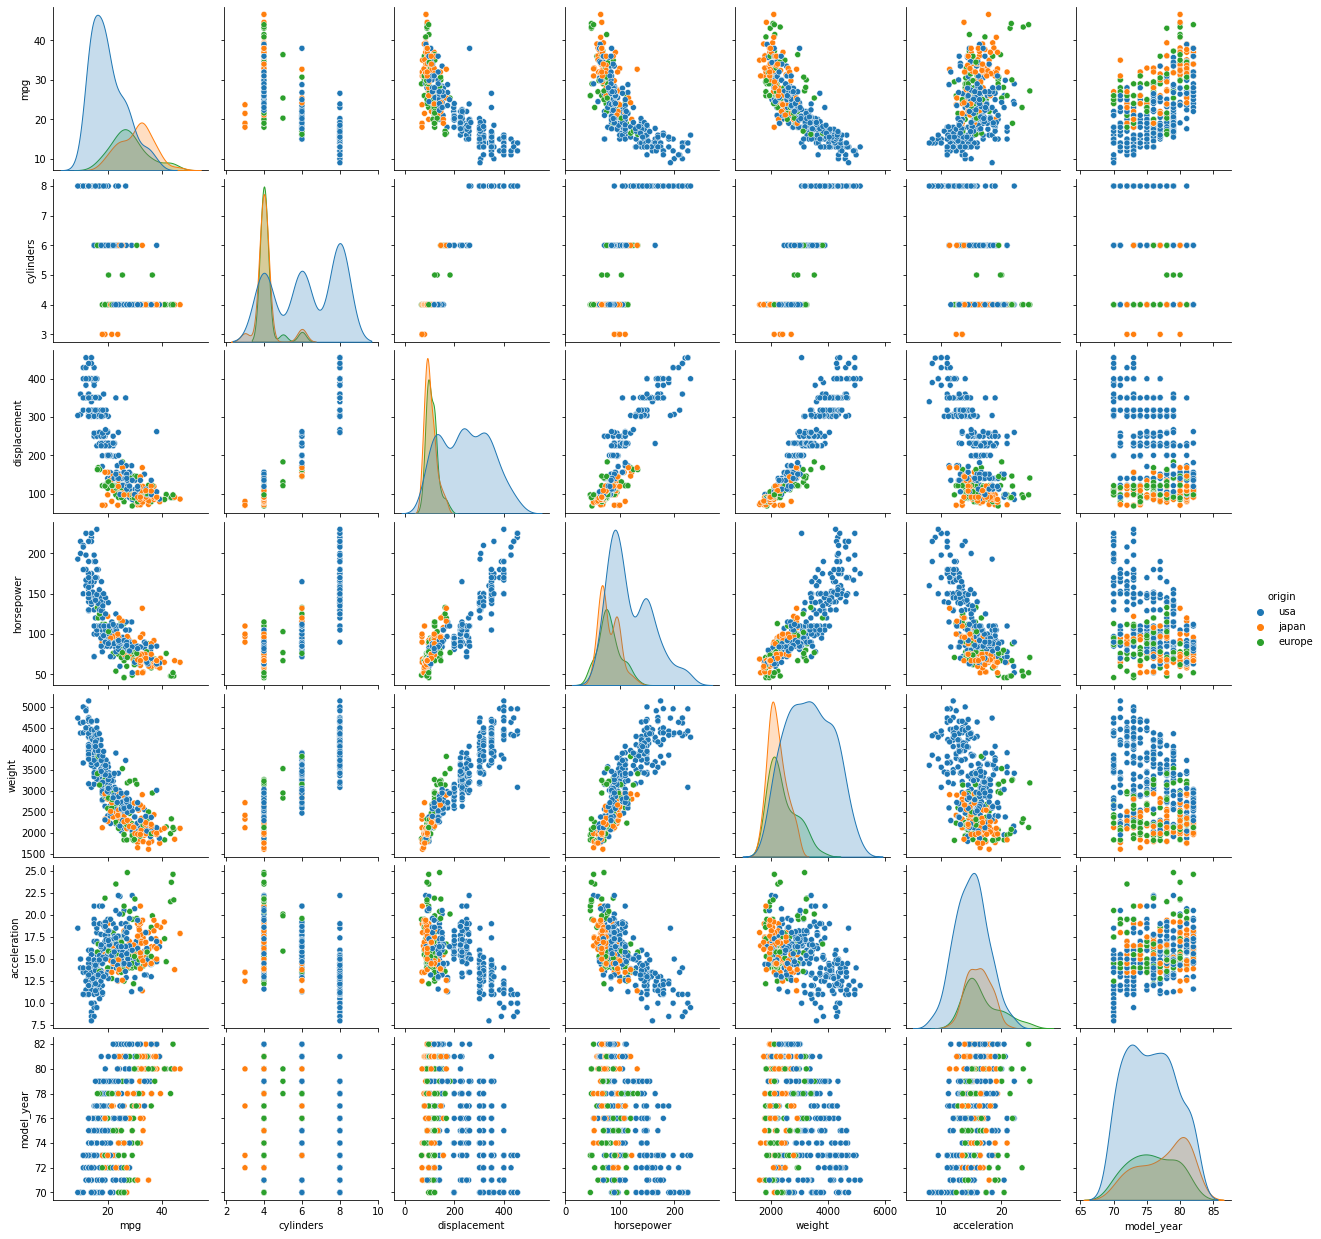

In [5]:
fig = plt.figure(figsize=(12,6))
sns.pairplot(mpg,hue='origin')
plt.show()

In [4]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')